In [1]:
from tools import *
%matplotlib notebook
import pandas as pd

from astropy.coordinates import SkyCoord
from dustmaps.bayestar import BayestarQuery
import astropy.units as u

from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [2]:
data = pd.read_csv('../calibration/kepler/K2_all_PS1_psc_ev.csv')
data = pd.read_csv('../calibration/kepler/K2_all_PS1_psc_ev_crowding.csv')
data = pd.read_csv('K2_all_PS1_psc_ev_crowding_sdss_gaia_ext.csv')
data = data.iloc[(data['PDC'].values > 0)]

data['kMeanPSFMag'] = -2.5*np.log10(data['PDC'].values)
data['kMeanPSFMagErr'] = 0.01#(-2.5 / np.log(10)) * (data['PDCe'].values / data['PDC'].values) #0.05#np.abs(data['PDCe'].values) / np.abs(data['PDC'].values)/10
#data = data.iloc[abs(data['kMeanPSFMagErr'].values) < 0.1] 
diff = abs(data['rMeanPSFMag'].values - data['crMeanPSFMag'].values)
ind = diff < 1

data = data.iloc[ind]

ind = ((abs(data['zMeanPSFMagErr'].values) < 0.5) & 
       (abs(data['gMeanPSFMagErr'].values) < 0.5) & 
       (abs(data['rMeanPSFMagErr'].values) < 0.5) & 
       (abs(data['iMeanPSFMagErr'].values) < 0.5))
data = data.iloc[ind]



<IPython.core.display.Javascript object>


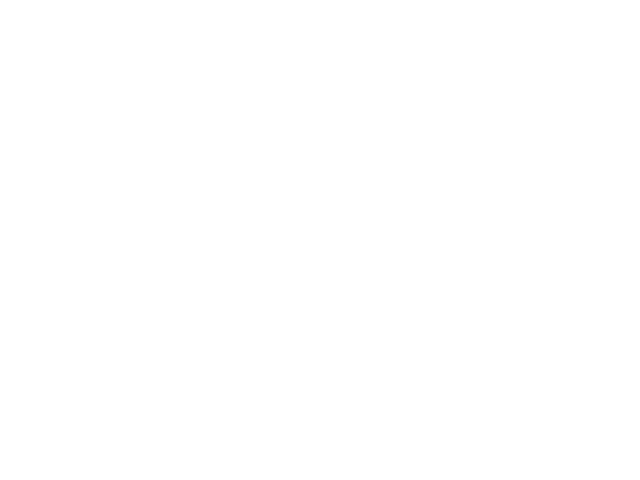

<IPython.core.display.Javascript object>


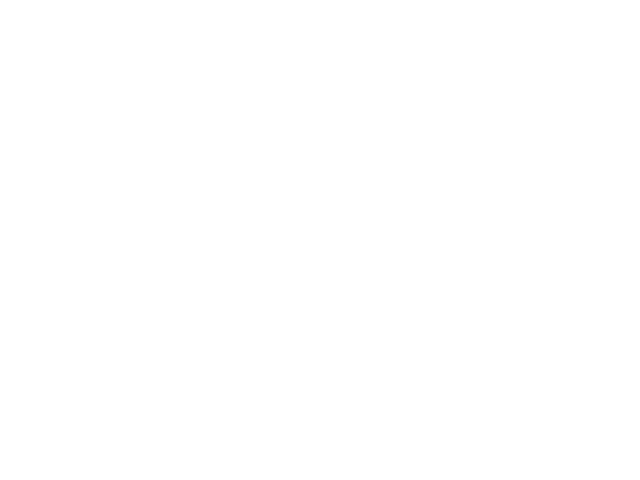

<IPython.core.display.Javascript object>


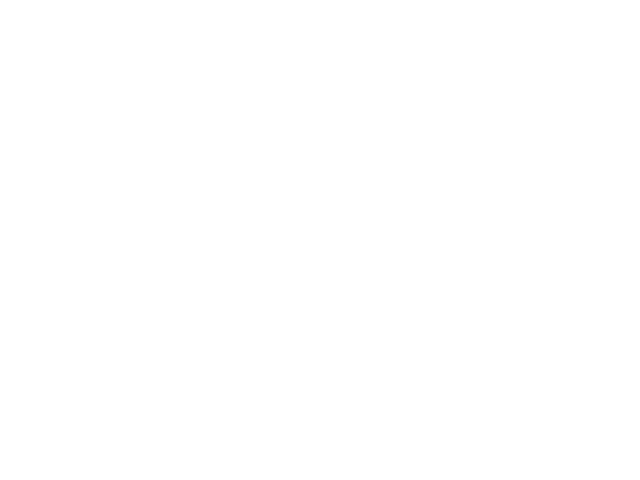

<IPython.core.display.Javascript object>


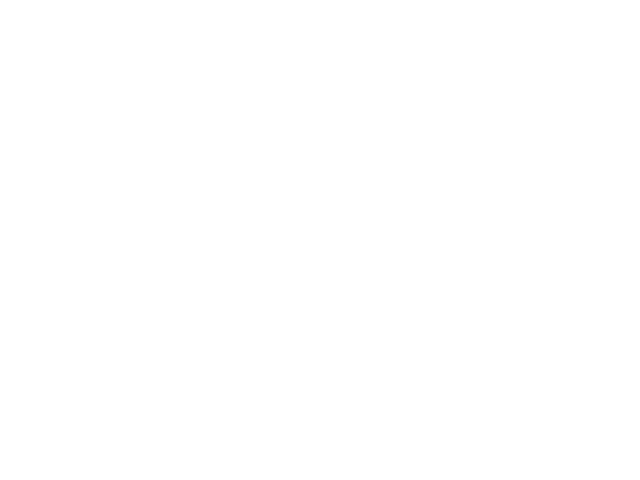

<IPython.core.display.Javascript object>


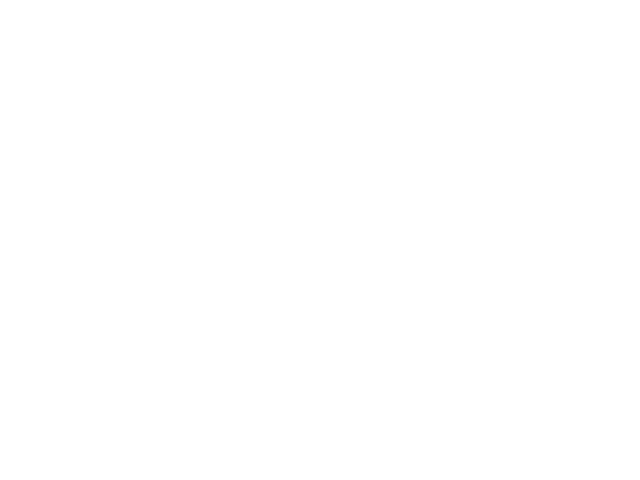

<IPython.core.display.Javascript object>


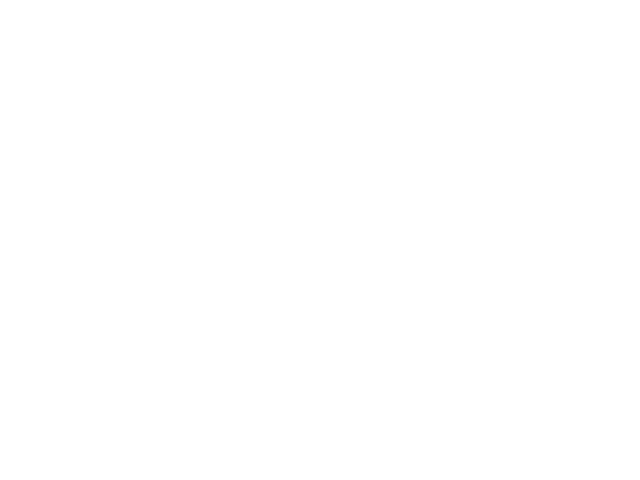

<IPython.core.display.Javascript object>


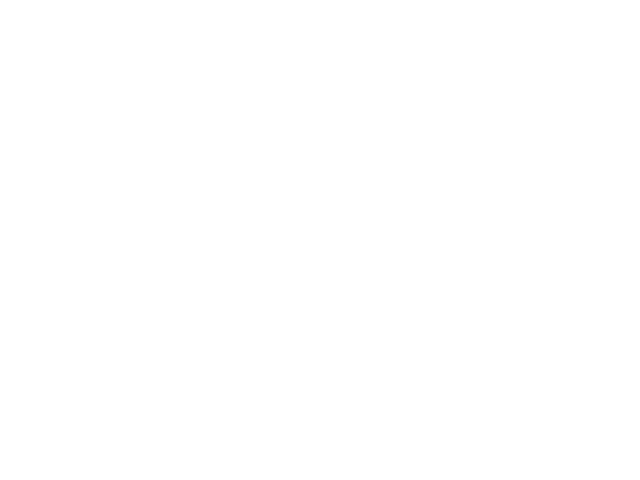

<IPython.core.display.Javascript object>


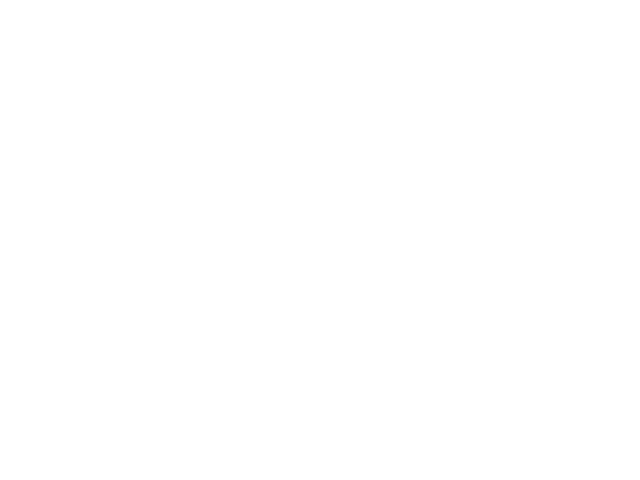

<IPython.core.display.Javascript object>


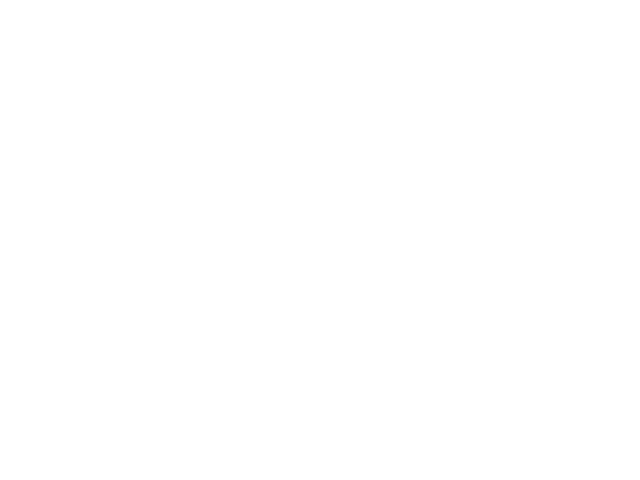

<IPython.core.display.Javascript object>


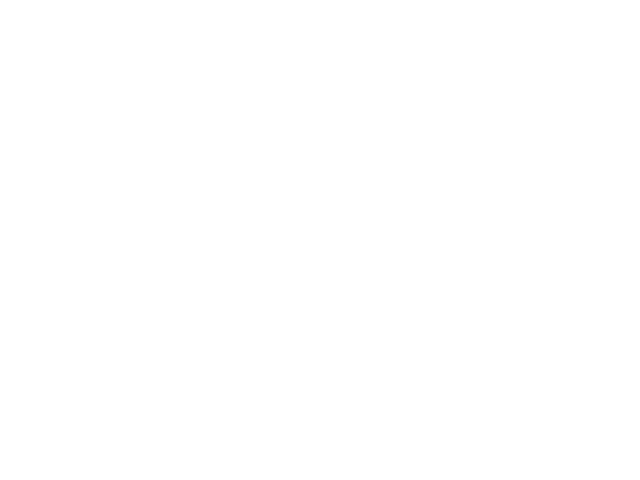

<IPython.core.display.Javascript object>


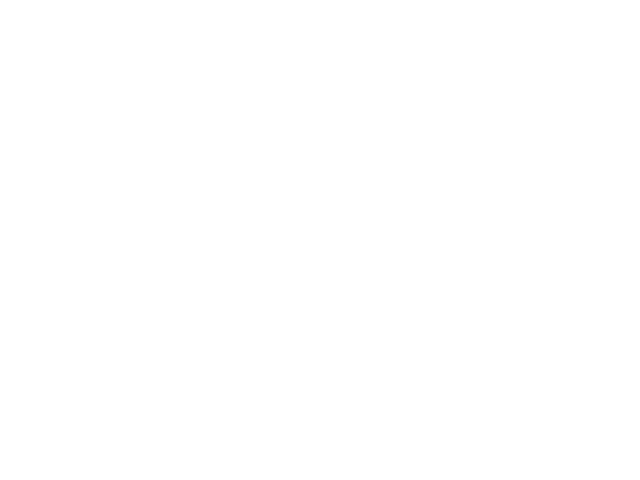

<IPython.core.display.Javascript object>


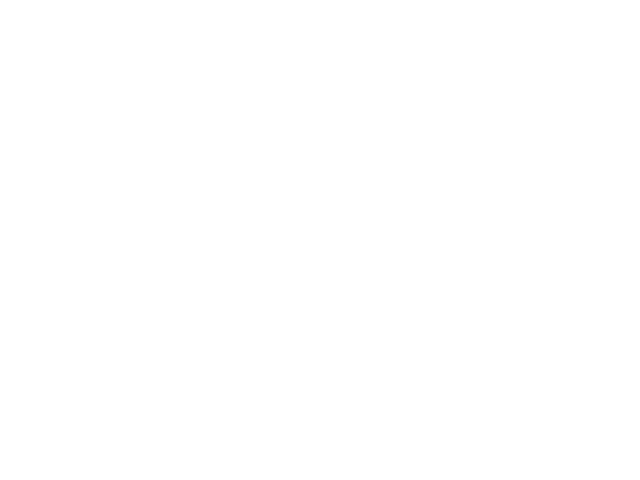

<IPython.core.display.Javascript object>


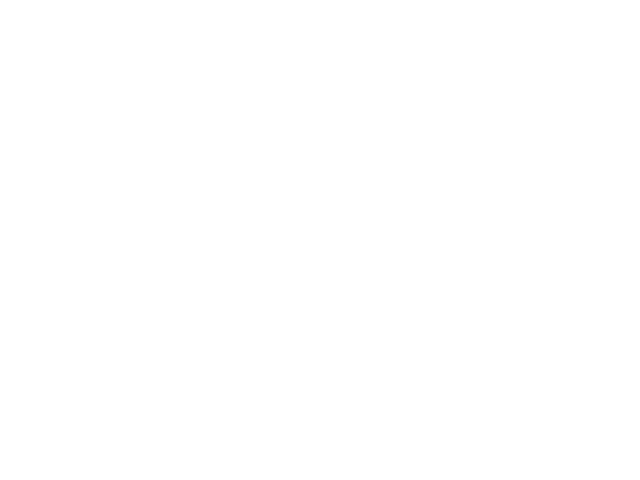

<IPython.core.display.Javascript object>


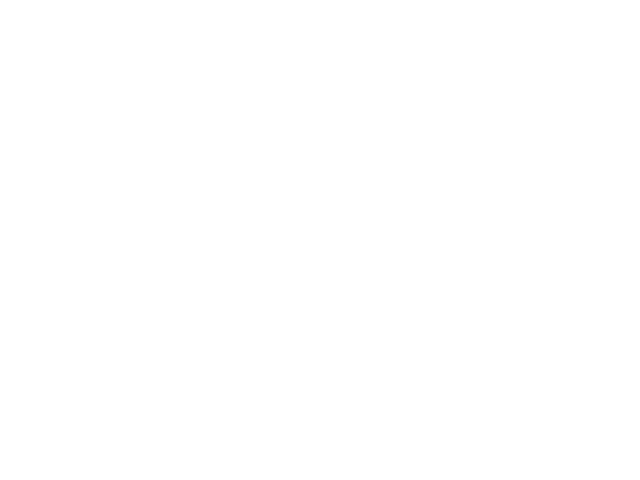

<IPython.core.display.Javascript object>


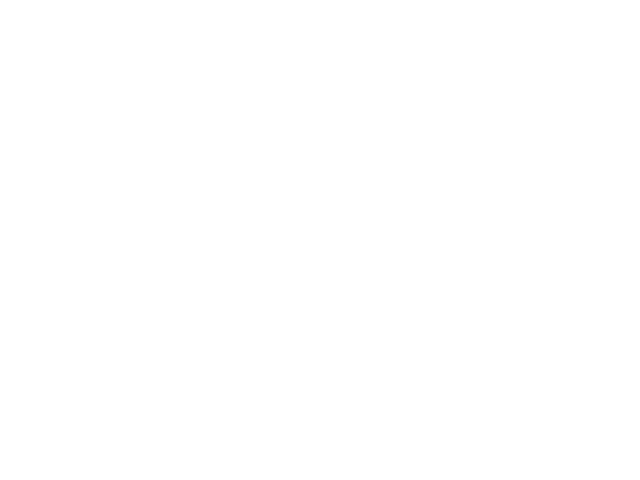

<IPython.core.display.Javascript object>


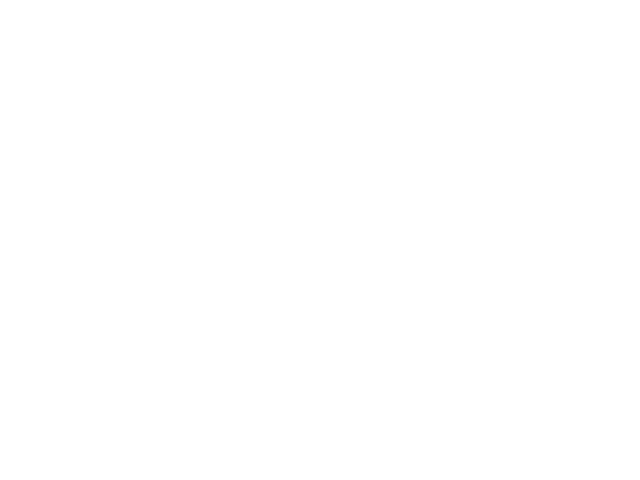

<IPython.core.display.Javascript object>


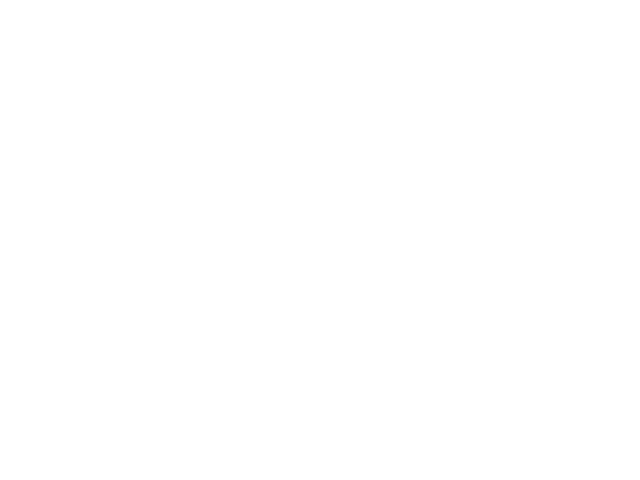

<IPython.core.display.Javascript object>


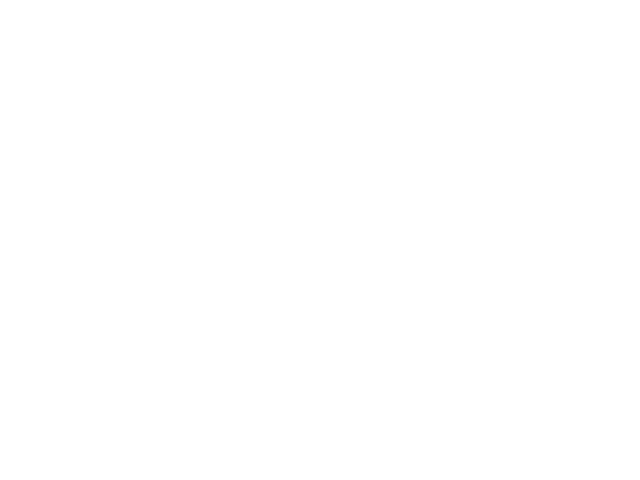

<IPython.core.display.Javascript object>


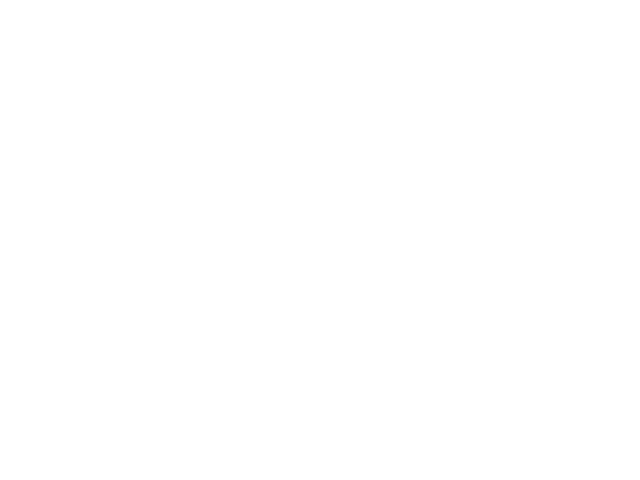

<IPython.core.display.Javascript object>


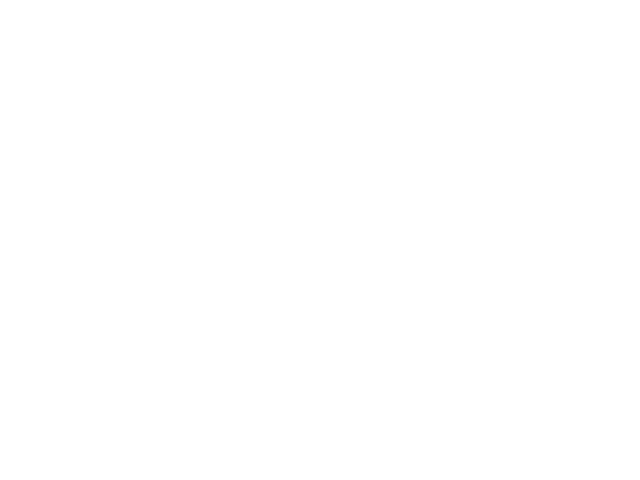

<IPython.core.display.Javascript object>


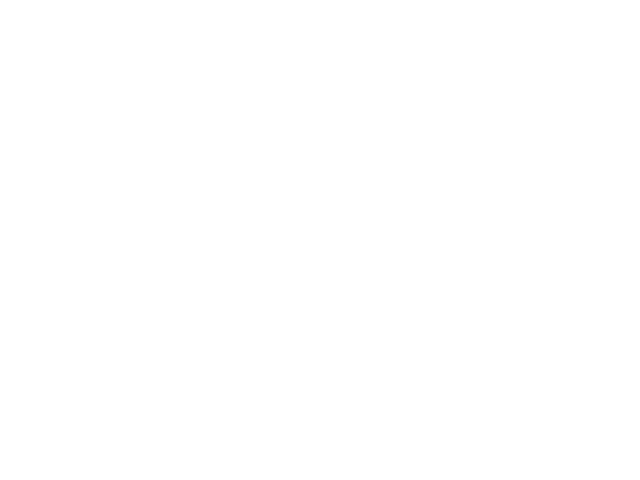

<IPython.core.display.Javascript object>


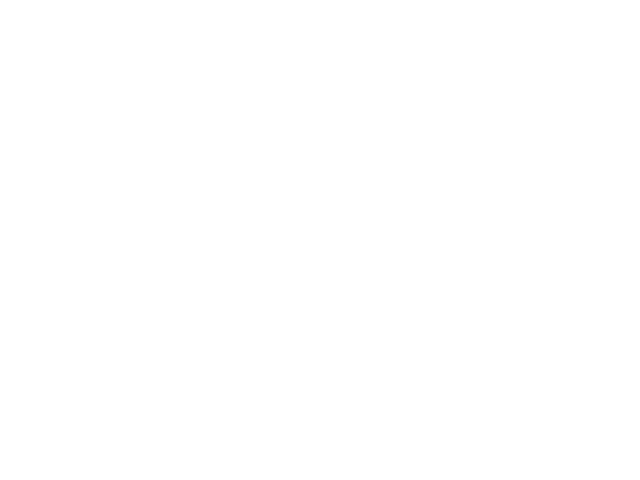

<IPython.core.display.Javascript object>


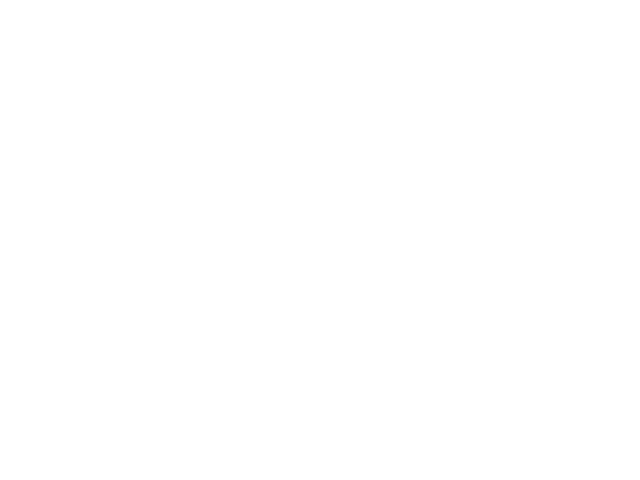

<IPython.core.display.Javascript object>


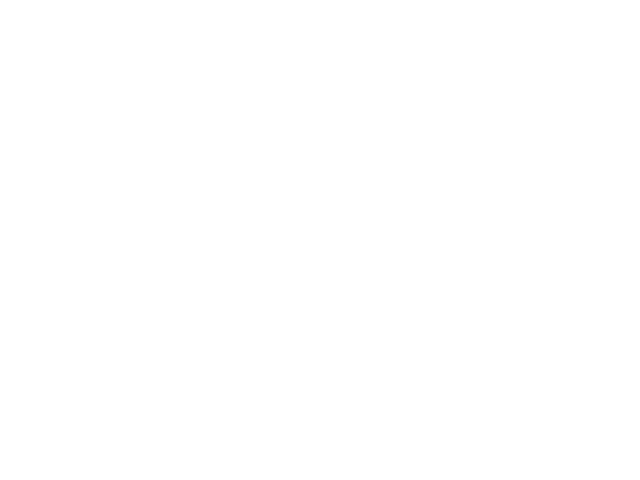

<IPython.core.display.Javascript object>


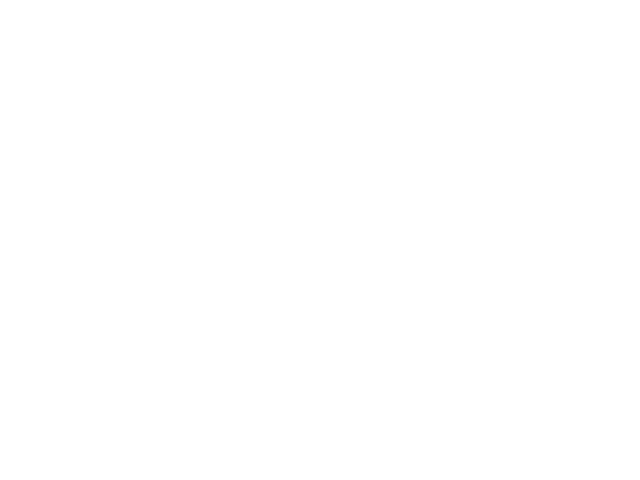

<IPython.core.display.Javascript object>


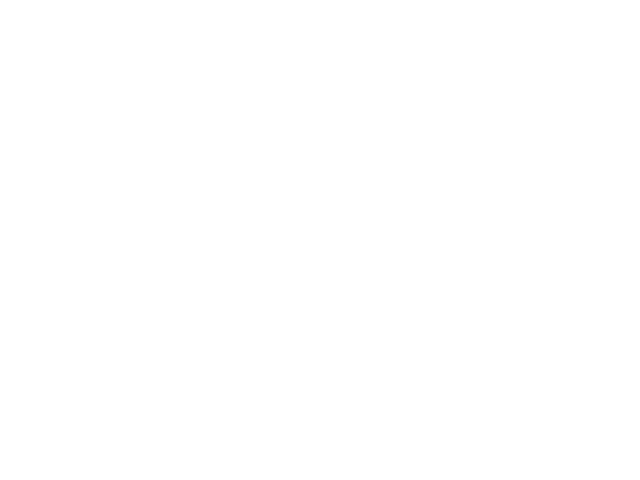

<IPython.core.display.Javascript object>


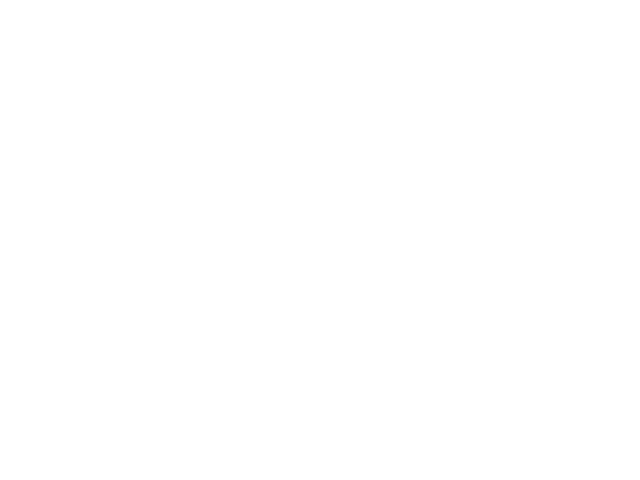

<IPython.core.display.Javascript object>


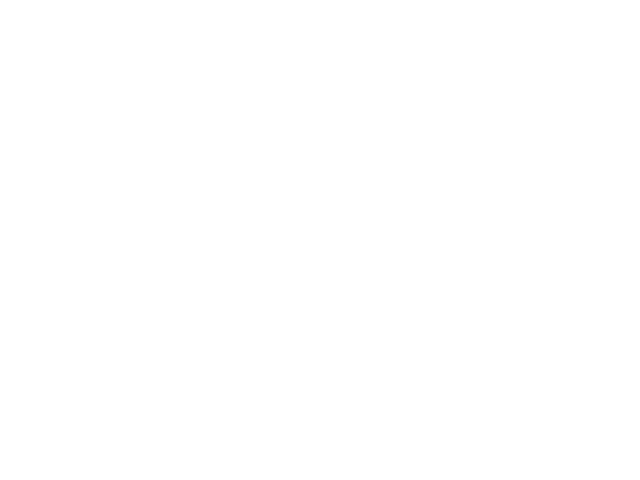

<IPython.core.display.Javascript object>


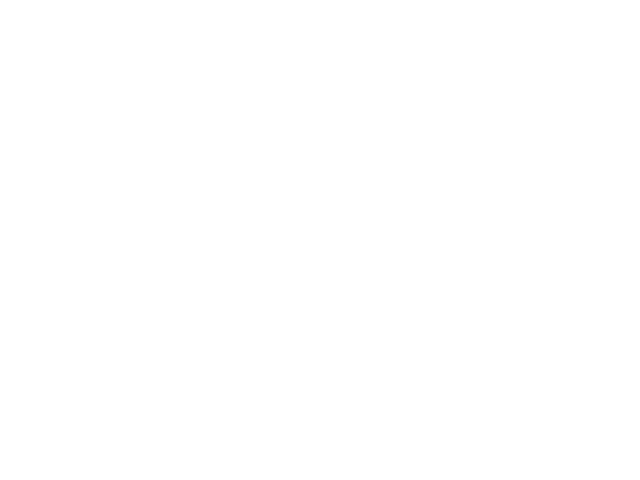

<IPython.core.display.Javascript object>


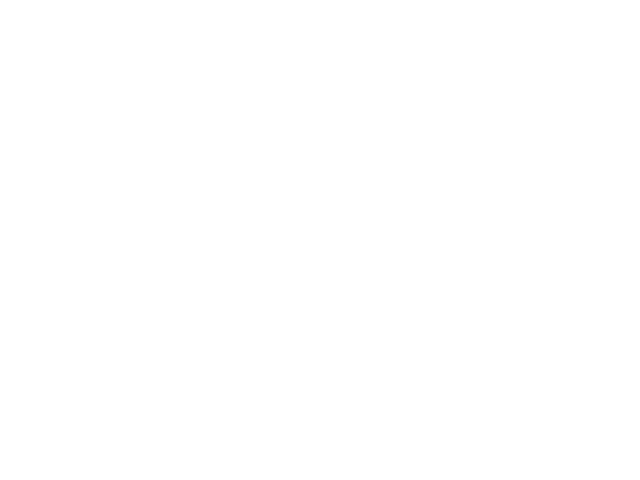

<IPython.core.display.Javascript object>


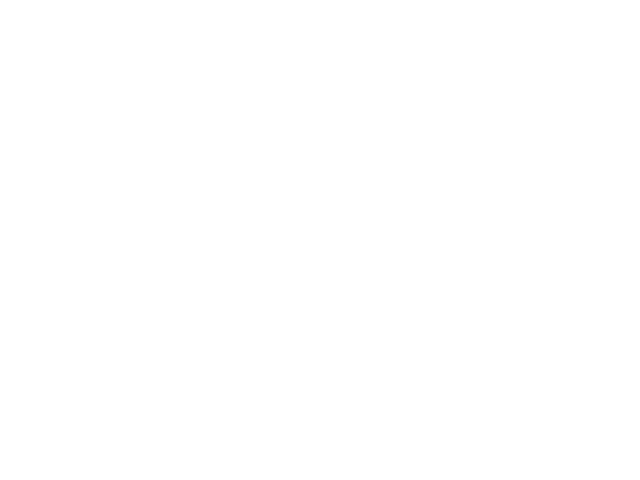

<IPython.core.display.Javascript object>


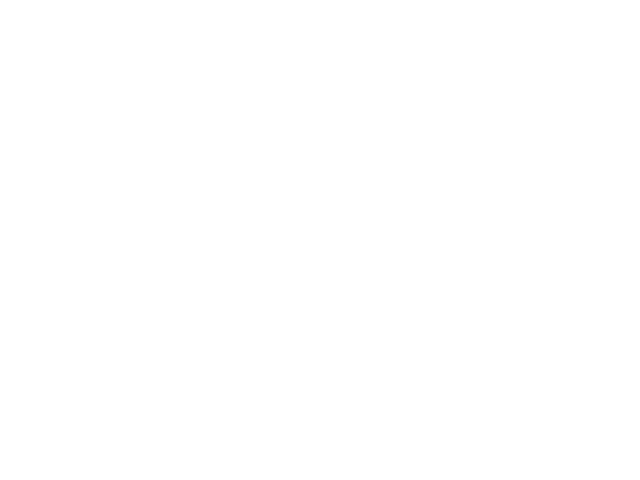

<IPython.core.display.Javascript object>


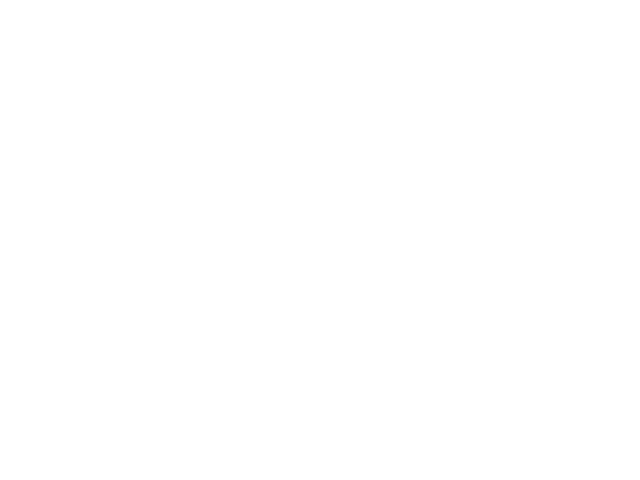

<IPython.core.display.Javascript object>


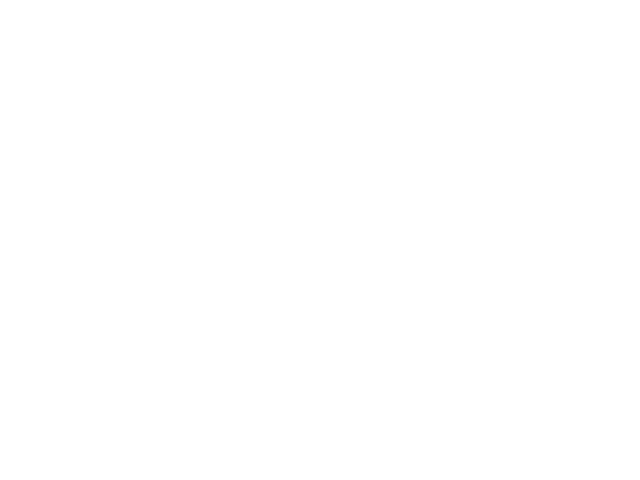

<IPython.core.display.Javascript object>


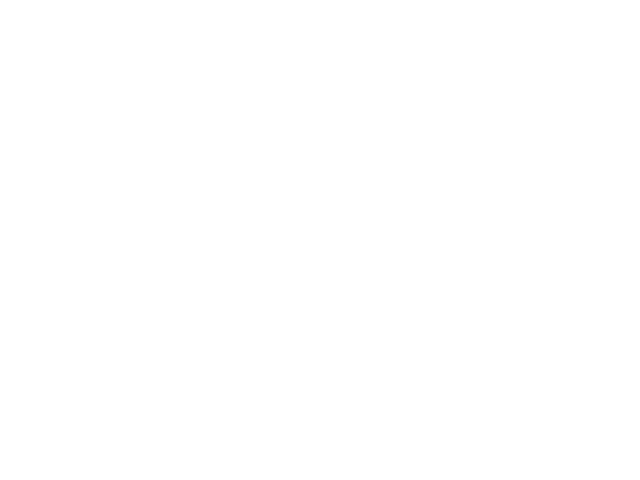

<IPython.core.display.Javascript object>


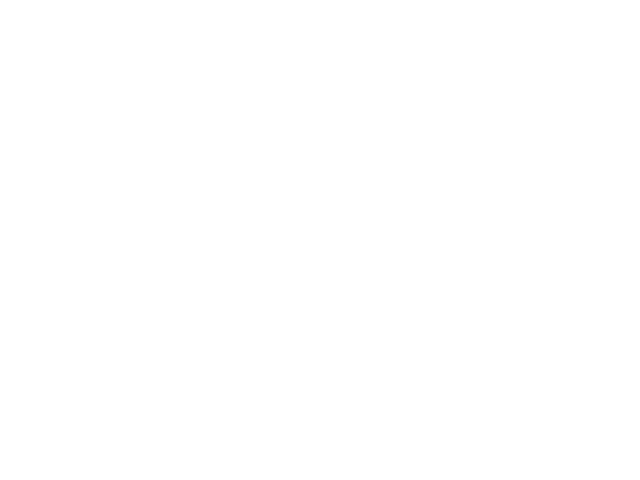

<IPython.core.display.Javascript object>


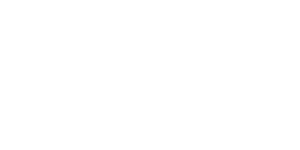

<IPython.core.display.Javascript object>


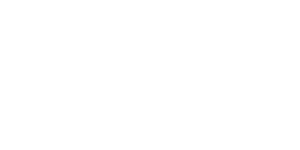

<IPython.core.display.Javascript object>


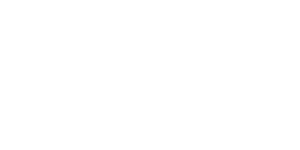

<IPython.core.display.Javascript object>


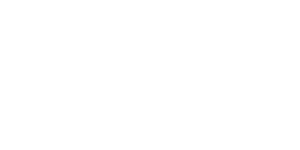

<IPython.core.display.Javascript object>


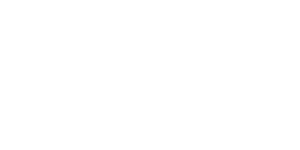

<IPython.core.display.Javascript object>


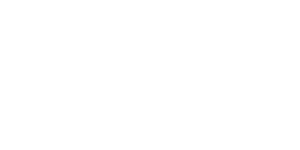

<IPython.core.display.Javascript object>


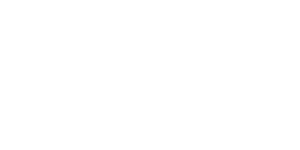

<IPython.core.display.Javascript object>


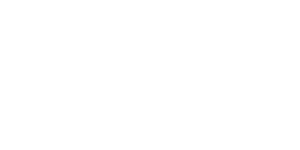

<IPython.core.display.Javascript object>


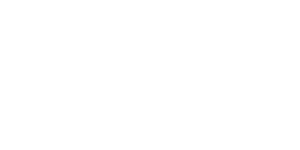

<IPython.core.display.Javascript object>


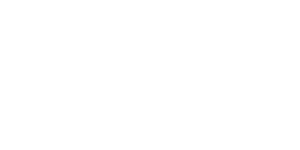

<IPython.core.display.Javascript object>


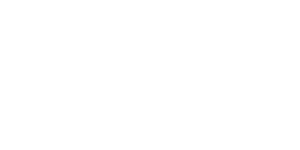

<IPython.core.display.Javascript object>


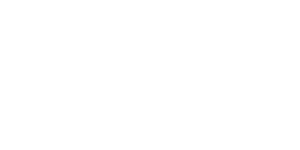

<IPython.core.display.Javascript object>


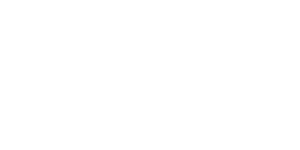

<IPython.core.display.Javascript object>


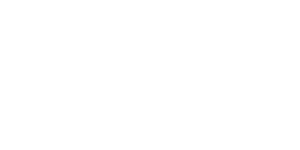

<IPython.core.display.Javascript object>


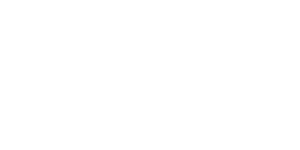

<IPython.core.display.Javascript object>


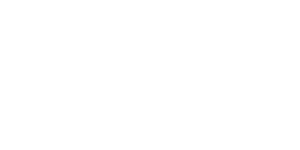

<IPython.core.display.Javascript object>


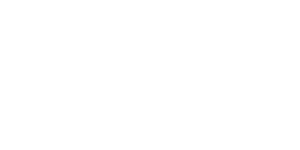

<IPython.core.display.Javascript object>


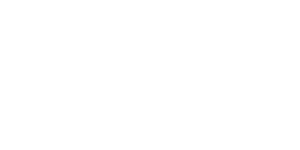

<IPython.core.display.Javascript object>


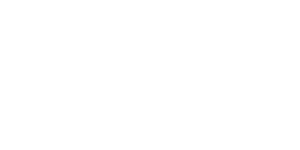

<IPython.core.display.Javascript object>


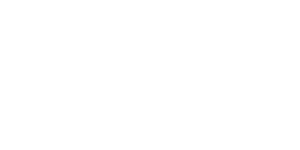

<IPython.core.display.Javascript object>


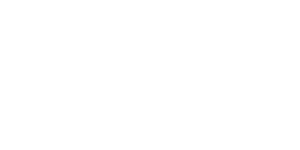

<IPython.core.display.Javascript object>


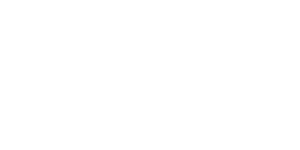

<IPython.core.display.Javascript object>


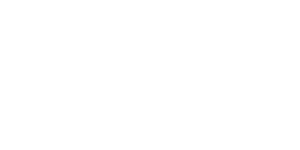

<IPython.core.display.Javascript object>


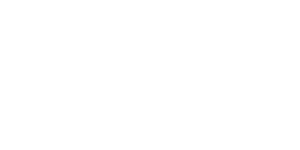

<IPython.core.display.Javascript object>


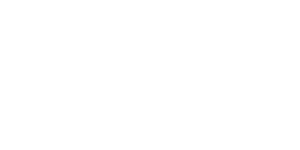

<IPython.core.display.Javascript object>


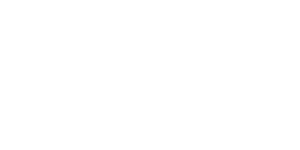

<IPython.core.display.Javascript object>


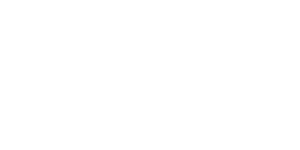

<IPython.core.display.Javascript object>


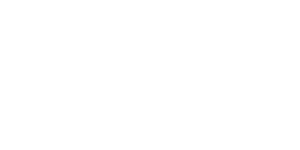

<IPython.core.display.Javascript object>


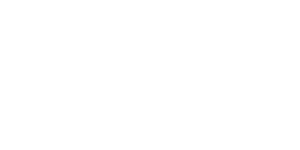

<IPython.core.display.Javascript object>


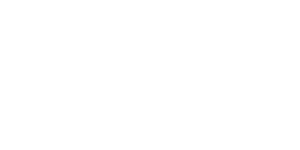

<IPython.core.display.Javascript object>


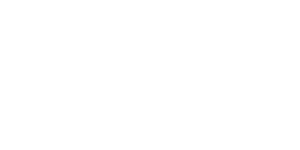

<IPython.core.display.Javascript object>


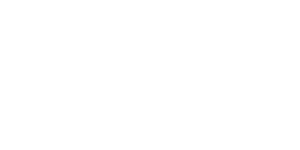

<IPython.core.display.Javascript object>


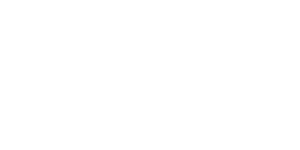

<IPython.core.display.Javascript object>


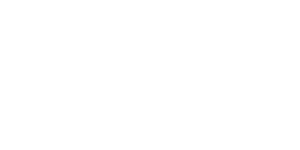

<IPython.core.display.Javascript object>


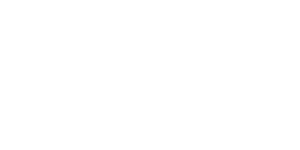

<IPython.core.display.Javascript object>


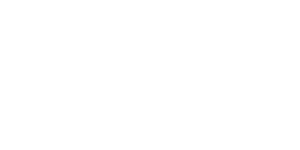

In [4]:
model = np.load('caspec_MS_mags.npy',allow_pickle=True).item()


camp = np.arange(0,20)
zps_z = np.zeros((20,84))
zps_k = np.zeros((20,84))
exs = np.zeros((20,84))
for j in range(1):#len(camp)):
    for i in range(85):
        j = 16
        cind =  ((data['campaign'].values == camp[j]) & (data['Channel'].values == i+1))
        if len(data.iloc[cind]) > 10:
            ex, dat = Tonry_reduce(data.iloc[cind],plot=True)
            plt.title('B19 = '+str(ex[0]))
            plt.savefig('figs/slr_ext_comp_r/ext_camp{}_ch{}.pdf'.format(j,i))
            plt.close()
            exs[j,i] = ex

In [4]:
np.save('output/extinctions2.npy',exs)

<IPython.core.display.Javascript object>


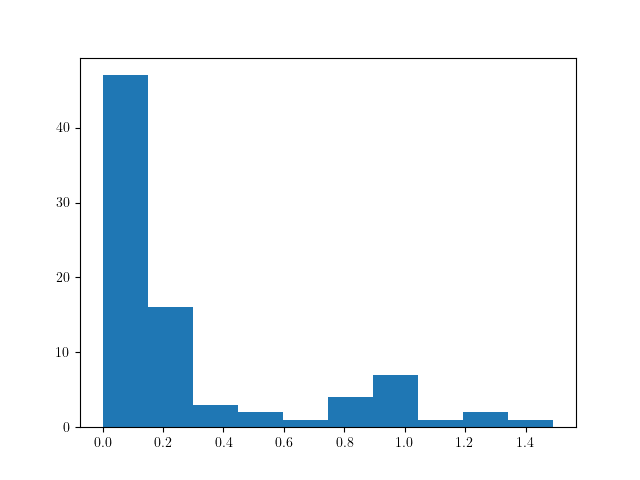

(array([47., 16.,  3.,  2.,  1.,  4.,  7.,  1.,  2.,  1.]),
 array([0.        , 0.14915261, 0.29830522, 0.44745784, 0.59661045,
        0.74576306, 0.89491567, 1.04406828, 1.19322089, 1.34237351,
        1.49152612]),
 <BarContainer object of 10 artists>)

In [51]:
plt.figure()
plt.hist(exs[2])

In [10]:
d = data.iloc[data['campaign'].values == 2]

In [121]:
np.nanmedian(d.gaia_med)

777.182363314787

<IPython.core.display.Javascript object>


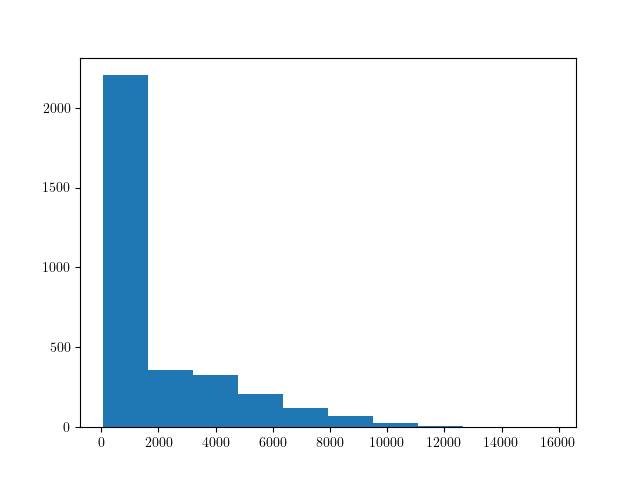

(array([2.204e+03, 3.570e+02, 3.280e+02, 2.050e+02, 1.220e+02, 7.000e+01,
        2.700e+01, 7.000e+00, 2.000e+00, 3.000e+00]),
 array([   42.69788797,  1620.16528715,  3197.63268633,  4775.10008552,
         6352.5674847 ,  7930.03488388,  9507.50228307, 11084.96968225,
        12662.43708143, 14239.90448062, 15817.3718798 ]),
 <BarContainer object of 10 artists>)

In [120]:
plt.figure()
plt.hist(d.gaia_med)

In [170]:
d = data.iloc[data['campaign'].values == 4]
ra = np.arange(np.nanmin(d.RAJ2000)-.5,np.nanmax(d.RAJ2000)+.5,.01)
dec = np.arange(-30.1,-14.8,.01)
ra, dec = np.meshgrid(ra, dec)
coords = SkyCoord(ra*u.deg, dec*u.deg,
                  distance=500.*u.pc)
coords2 = SkyCoord(ra*u.deg, dec*u.deg,
                  distance=100.*u.kpc)

sources = SkyCoord(d.RAJ2000.values*u.deg, d.DecJ2000.values*u.deg,distance=100.*u.pc, frame='icrs')

bayestar = BayestarQuery()
#red = bayestar(coords, mode='median')
#redd = bayestar(coords2, mode='median')
red2 = bayestar(sources, mode='median')

#red = red / (3.1 * 0.981)

Loading pixel_info ...
Loading samples ...
Loading best_fit ...
Replacing NaNs in reliable distance estimates ...
Sorting pixel_info ...
Extracting hp_idx_sorted and data_idx at each nside ...
  nside = 64
  nside = 128
  nside = 256
  nside = 512
  nside = 1024
t = 31.740 s
  pix_info:   0.456 s
   samples:  21.177 s
      best:   4.177 s
       nan:   0.167 s
      sort:   5.603 s
       idx:   0.160 s


<IPython.core.display.Javascript object>


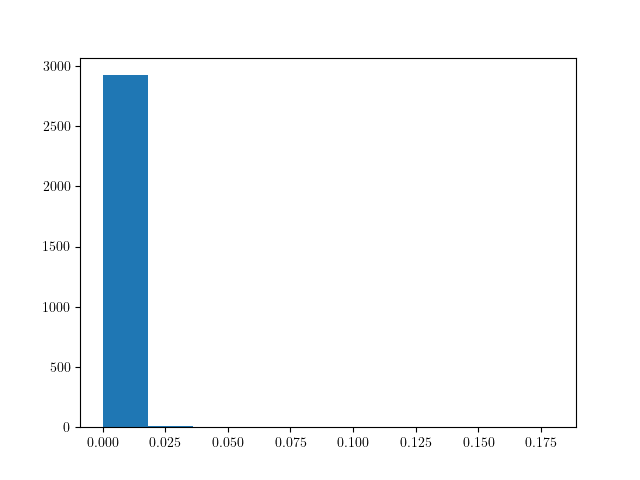

(array([2.923e+03, 1.100e+01, 3.000e+00, 4.000e+00, 3.000e+00, 5.000e+00,
        2.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([0.        , 0.018     , 0.036     , 0.054     , 0.072     ,
        0.09      , 0.108     , 0.12599999, 0.144     , 0.162     ,
        0.17999999], dtype=float32),
 <BarContainer object of 10 artists>)

In [171]:
plt.figure()
plt.hist(red2)

In [35]:
extinctions = np.load('extinctions.npy')

In [111]:
d = data.iloc[data['campaign'].values == 2]
channel_inds = d['Channel'].values
camp_inds = d['campaign'].values
ex = exs[2][channel_inds-1]
#ex[slr == 0] = np.nan


In [89]:
red2.shape

(3393,)

In [90]:
d.shape

(3393, 84)

In [113]:
channel_inds = data['Channel'].values
camp_inds = data['campaign'].values

av = np.zeros_like(exs)
for i in range(max(camp_inds)):
    for j in range(max(channel_inds)):
        ind = (data['Channel'].values == channel_inds[j]) & (data['campaign'].values == camp_inds[i])
        av[i,j] = np.nanmedian(data.ext_med.values[ind])

In [172]:
channel_inds = d['Channel'].values

av2 = np.zeros_like(exs[2])
for j in range(84):
    ind =(d['Channel'].values == j)
    av2[j] = np.nanmean(red2[ind])

<IPython.core.display.Javascript object>


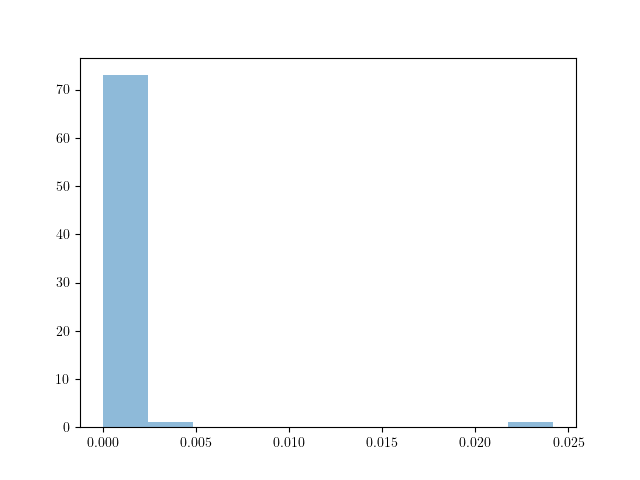

(array([73.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.        , 0.00241975, 0.00483951, 0.00725926, 0.00967901,
        0.01209877, 0.01451852, 0.01693827, 0.01935803, 0.02177778,
        0.02419753]),
 <BarContainer object of 10 artists>)

In [173]:
plt.figure()
plt.hist(av2,alpha =.5)
#plt.hist(red2,alpha =.5)

In [157]:
exs[2].shape

(84,)

<IPython.core.display.Javascript object>


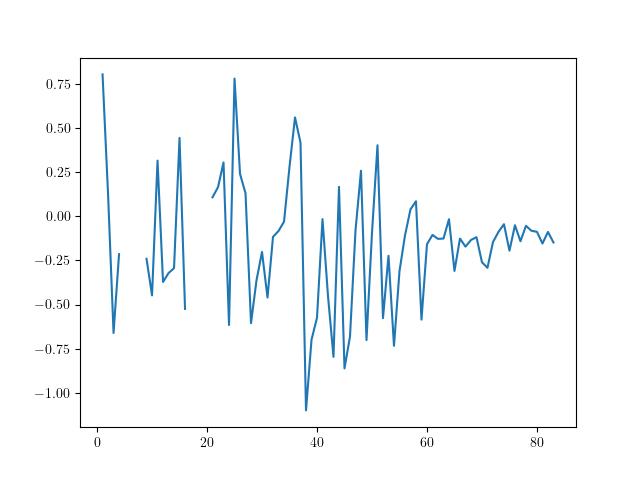

In [163]:
plt.figure()
plt.plot(exs[2]-av2)

<IPython.core.display.Javascript object>


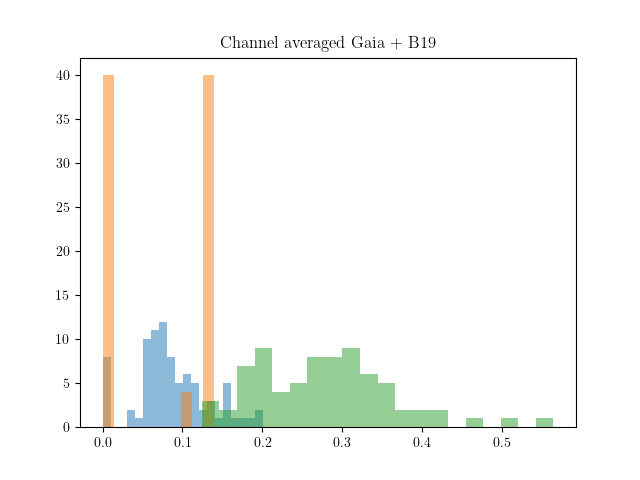

(array([3., 2., 7., 9., 4., 5., 8., 8., 9., 6., 5., 2., 2., 2., 0., 1., 0.,
        1., 0., 1.]),
 array([0.12419235, 0.1461945 , 0.16819665, 0.1901988 , 0.21220095,
        0.23420309, 0.25620524, 0.27820739, 0.30020954, 0.32221169,
        0.34421384, 0.36621599, 0.38821814, 0.41022029, 0.43222244,
        0.45422458, 0.47622673, 0.49822888, 0.52023103, 0.54223318,
        0.56423533]),
 <BarContainer object of 20 artists>)

In [168]:
plt.figure()
plt.title('Channel averaged Gaia + B19')
plt.hist(exs[4],alpha =.5,bins=20)
plt.hist(av[4],alpha =.5)
plt.hist(av2,alpha =.5,bins=20)


<IPython.core.display.Javascript object>


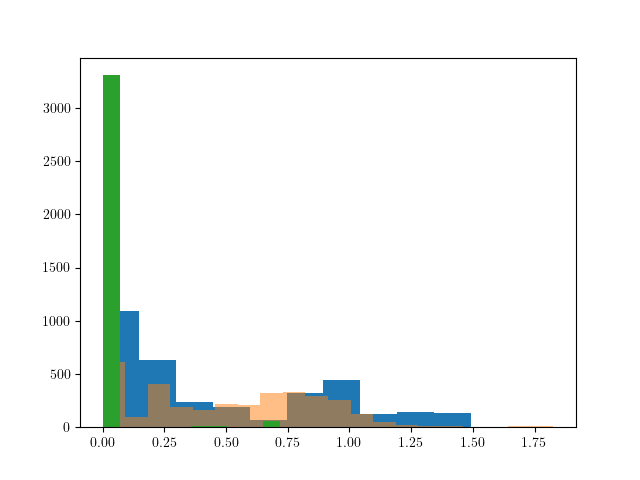

(array([3.309e+03, 0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 7.000e+00,
        1.400e+01, 4.000e+00, 0.000e+00, 5.600e+01]),
 array([0.        , 0.07204938, 0.14409876, 0.21614814, 0.28819752,
        0.3602469 , 0.43229628, 0.50434566, 0.57639503, 0.64844441,
        0.72049379]),
 <BarContainer object of 10 artists>)

In [118]:
plt.figure()
plt.hist(ex)
plt.hist(d.ext_high.values,alpha =.5,bins=20)
plt.hist(av2)

In [348]:
%matplotlib inline 

<IPython.core.display.Javascript object>


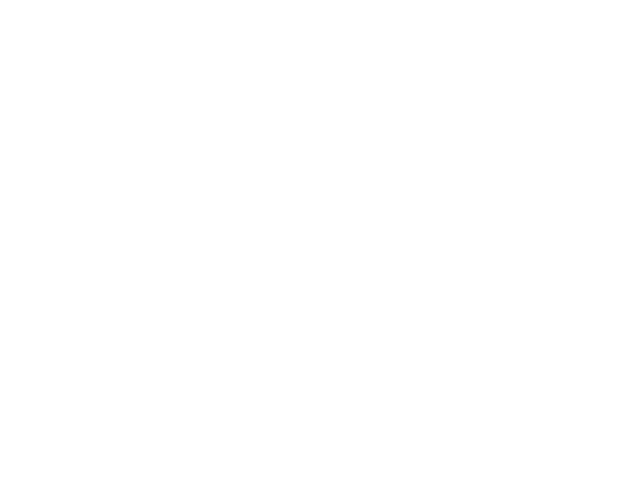

NameError: name 'ra' is not defined

In [27]:
eh = d.ext_med.values - ex
plt.figure()
im = plt.imshow(np.zeros_like(eh)*np.nan,extent=[ra[0,0],ra[-1,-1],dec[-1,-1],dec[0,0]],
           vmin=np.nanmin(eh),vmax=np.nanmax(eh),cmap='plasma')
sc = plt.scatter(d.RAJ2000,d.DecJ2000,marker='.',c=eh,alpha=.5,cmap='plasma')


<IPython.core.display.Javascript object>


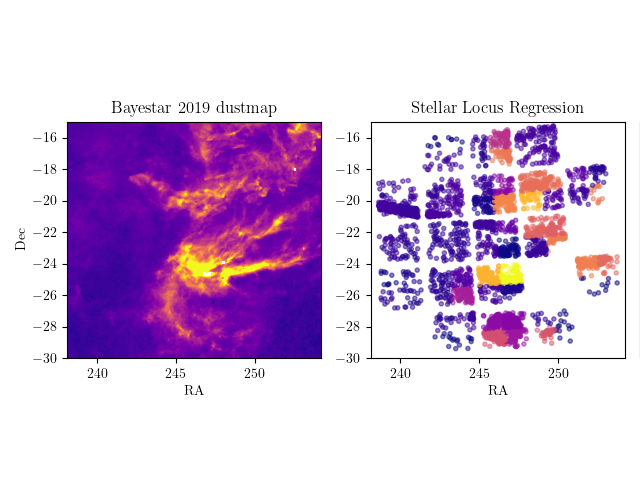

In [88]:
fig = plt.figure()
plt.subplot(121)
plt.title('Bayestar 2019 dustmap')
im = plt.imshow(red,extent=[ra[0,0],ra[-1,-1],dec[-1,-1],dec[0,0]],
           vmin=np.nanmin(ex),vmax=np.nanmax(ex),cmap='plasma')

plt.ylim(-30,-15)
plt.ylabel('Dec')
plt.xlabel('RA')
#divider = make_axes_locatable(plt.gca())
#cax = divider.append_axes("right", size="5%", pad=0.05)
#plt.colorbar(im, cax=cax)

plt.subplot(122)
plt.title('Stellar Locus Regression')
#plt.imshow(red/3.1,vmin=0.,extent=[ra[0,0],ra[-1,-1],dec[-1,-1],dec[0,0]])
im = plt.imshow(np.zeros_like(red)*np.nan,extent=[ra[0,0],ra[-1,-1],dec[-1,-1],dec[0,0]],
           vmin=np.nanmin(ex),vmax=np.nanmax(ex),cmap='plasma')

plt.ylim(-30,-15)
sc = plt.scatter(d.RAJ2000,d.DecJ2000,marker='.',c=ex,alpha=.5,cmap='plasma')
plt.xlabel('RA')
#divider = make_axes_locatable(plt.gca())
#cax = divider.append_axes("right", size="5%", pad=0.05)
#cbar = plt.colorbar(im, cax=cax)

fig.subplots_adjust(right=1.1)
cbar_ax = fig.add_axes([1, 0.254, 0.02, 0.493])
cbar = fig.colorbar(im, cax=cbar_ax)

cbar.set_label('B19')

#plt.scatter(d.RAJ2000,d.DecJ2000,marker='.',c=Av2_bayestar/3.1,alpha=.1)
plt.tight_layout()
plt.savefig('figs/dustmap_compare/dustmap_slr.pdf', bbox_inches='tight')

In [19]:
ex

array([0.03832748, 0.03832748, 0.05208231, ..., 0.19364897, 0.19364897,
       0.19364897])

Loading pixel_info ...
Loading samples ...
Loading best_fit ...
Replacing NaNs in reliable distance estimates ...
Sorting pixel_info ...
Extracting hp_idx_sorted and data_idx at each nside ...
  nside = 64
  nside = 128
  nside = 256
  nside = 512
  nside = 1024
t = 31.190 s
  pix_info:   0.424 s
   samples:  21.040 s
      best:   3.965 s
       nan:   0.165 s
      sort:   5.446 s
       idx:   0.150 s


<IPython.core.display.Javascript object>


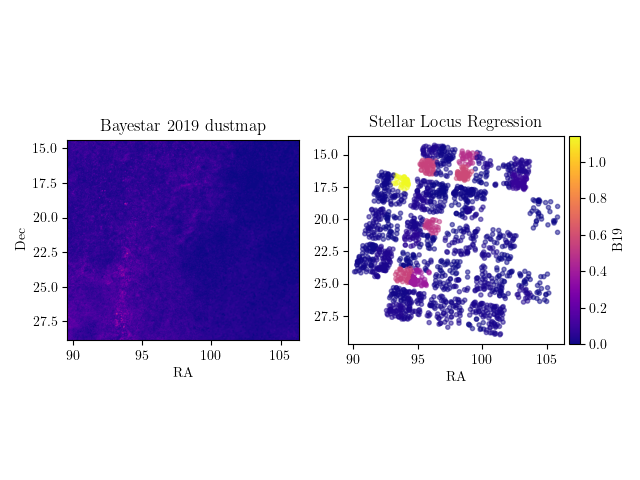

Loading pixel_info ...
Loading samples ...
Loading best_fit ...
Replacing NaNs in reliable distance estimates ...
Sorting pixel_info ...
Extracting hp_idx_sorted and data_idx at each nside ...
  nside = 64
  nside = 128
  nside = 256
  nside = 512
  nside = 1024
t = 30.395 s
  pix_info:   0.409 s
   samples:  20.106 s
      best:   4.217 s
       nan:   0.110 s
      sort:   5.412 s
       idx:   0.140 s


<IPython.core.display.Javascript object>


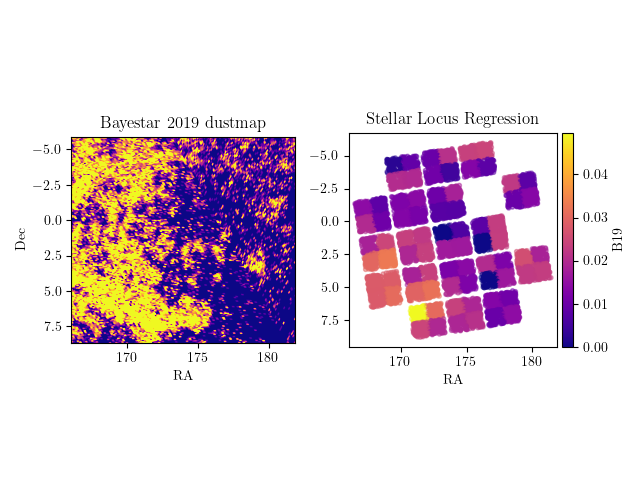

Loading pixel_info ...
Loading samples ...
Loading best_fit ...
Replacing NaNs in reliable distance estimates ...
Sorting pixel_info ...
Extracting hp_idx_sorted and data_idx at each nside ...
  nside = 64
  nside = 128
  nside = 256
  nside = 512
  nside = 1024
t = 27.793 s
  pix_info:   0.402 s
   samples:  17.919 s
      best:   3.902 s
       nan:   0.025 s
      sort:   5.400 s
       idx:   0.146 s


<IPython.core.display.Javascript object>


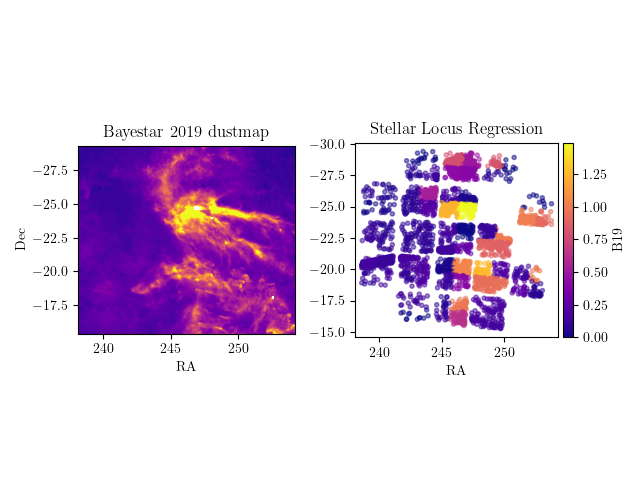

Loading pixel_info ...
Loading samples ...
Loading best_fit ...
Replacing NaNs in reliable distance estimates ...
Sorting pixel_info ...
Extracting hp_idx_sorted and data_idx at each nside ...
  nside = 64
  nside = 128
  nside = 256
  nside = 512
  nside = 1024
t = 31.431 s
  pix_info:   0.398 s
   samples:  20.144 s
      best:   4.323 s
       nan:   0.064 s
      sort:   6.363 s
       idx:   0.139 s


<IPython.core.display.Javascript object>


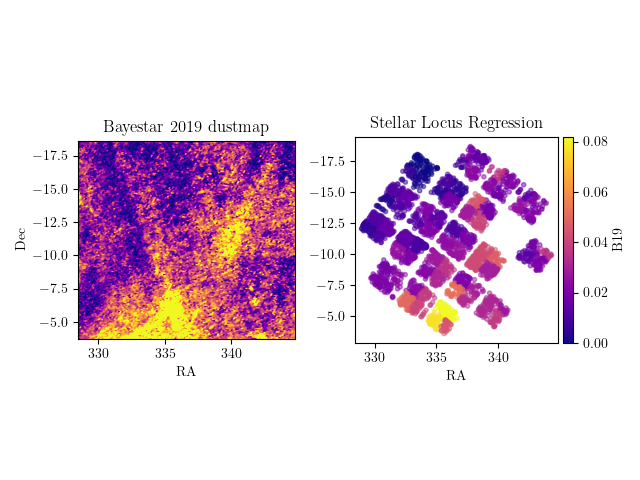

Loading pixel_info ...
Loading samples ...
Loading best_fit ...
Replacing NaNs in reliable distance estimates ...
Sorting pixel_info ...
Extracting hp_idx_sorted and data_idx at each nside ...
  nside = 64
  nside = 128
  nside = 256
  nside = 512
  nside = 1024
t = 30.235 s
  pix_info:   0.366 s
   samples:  19.919 s
      best:   4.131 s
       nan:   0.026 s
      sort:   5.667 s
       idx:   0.126 s


<IPython.core.display.Javascript object>


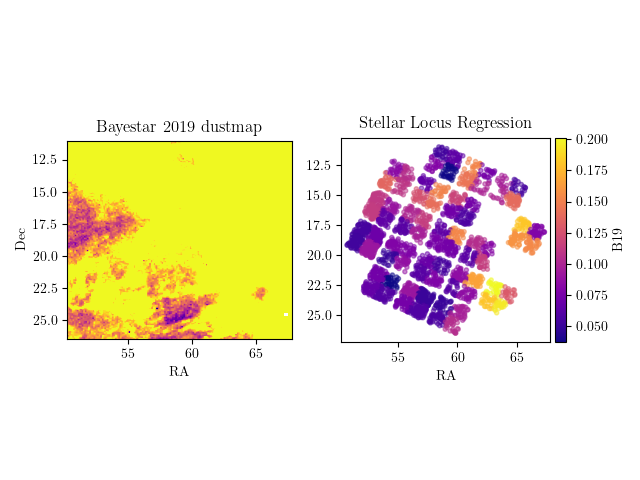

Loading pixel_info ...
Loading samples ...
Loading best_fit ...
Replacing NaNs in reliable distance estimates ...
Sorting pixel_info ...
Extracting hp_idx_sorted and data_idx at each nside ...
  nside = 64
  nside = 128
  nside = 256
  nside = 512
  nside = 1024
t = 29.193 s
  pix_info:   0.369 s
   samples:  18.956 s
      best:   4.158 s
       nan:   0.027 s
      sort:   5.550 s
       idx:   0.133 s


<IPython.core.display.Javascript object>


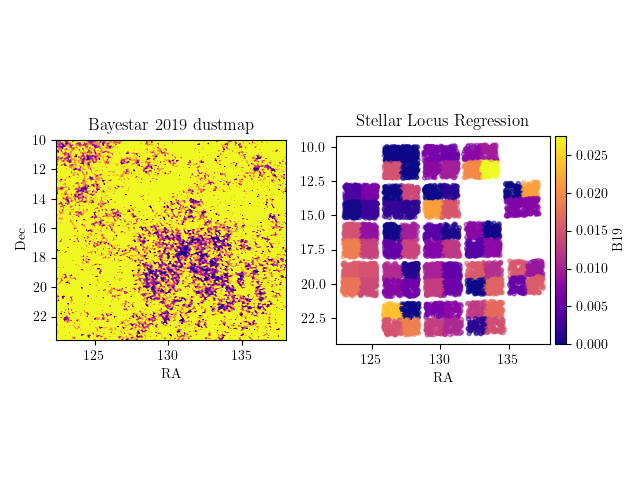

Loading pixel_info ...
Loading samples ...
Loading best_fit ...
Replacing NaNs in reliable distance estimates ...
Sorting pixel_info ...
Extracting hp_idx_sorted and data_idx at each nside ...
  nside = 64
  nside = 128
  nside = 256
  nside = 512
  nside = 1024
t = 29.158 s
  pix_info:   0.384 s
   samples:  19.284 s
      best:   4.049 s
       nan:   0.022 s
      sort:   5.298 s
       idx:   0.120 s


<IPython.core.display.Javascript object>


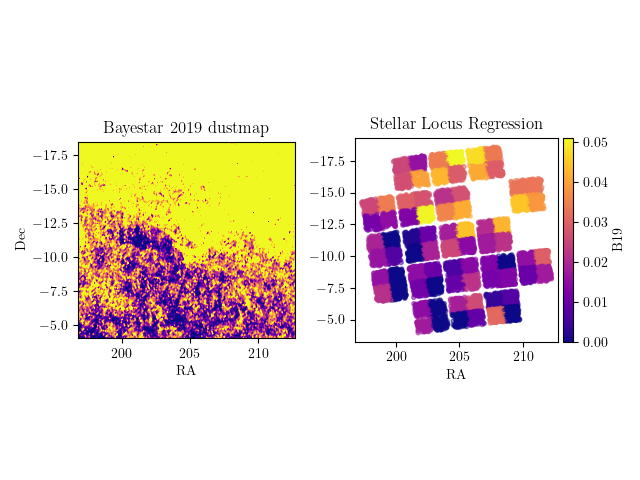

Loading pixel_info ...
Loading samples ...
Loading best_fit ...
Replacing NaNs in reliable distance estimates ...
Sorting pixel_info ...
Extracting hp_idx_sorted and data_idx at each nside ...
  nside = 64
  nside = 128
  nside = 256
  nside = 512
  nside = 1024
t = 30.291 s
  pix_info:   0.429 s
   samples:  19.536 s
      best:   3.988 s
       nan:   0.031 s
      sort:   6.179 s
       idx:   0.128 s


<IPython.core.display.Javascript object>


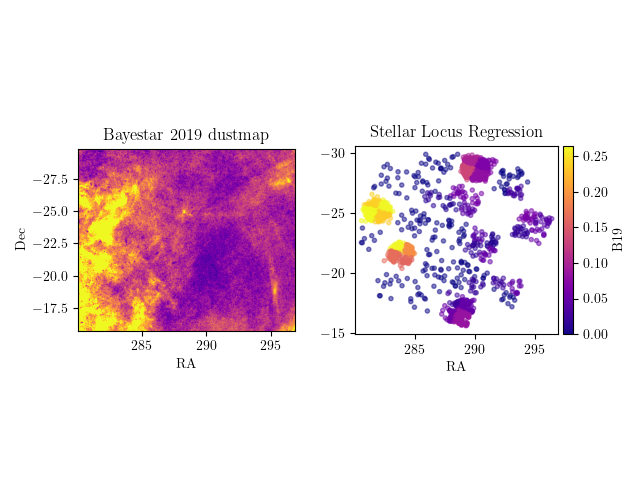

Loading pixel_info ...
Loading samples ...
Loading best_fit ...
Replacing NaNs in reliable distance estimates ...
Sorting pixel_info ...
Extracting hp_idx_sorted and data_idx at each nside ...
  nside = 64
  nside = 128
  nside = 256
  nside = 512
  nside = 1024
t = 28.790 s
  pix_info:   0.365 s
   samples:  18.459 s
      best:   4.417 s
       nan:   0.028 s
      sort:   5.385 s
       idx:   0.137 s


<IPython.core.display.Javascript object>


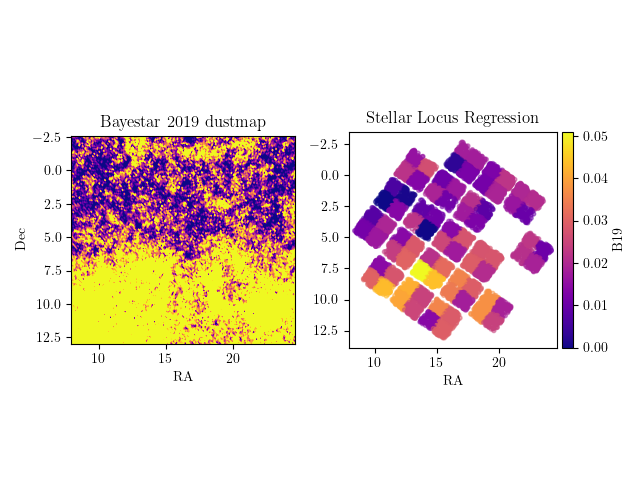

Loading pixel_info ...
Loading samples ...
Loading best_fit ...
Replacing NaNs in reliable distance estimates ...
Sorting pixel_info ...
Extracting hp_idx_sorted and data_idx at each nside ...
  nside = 64
  nside = 128
  nside = 256
  nside = 512
  nside = 1024
t = 29.536 s
  pix_info:   0.381 s
   samples:  19.064 s
      best:   4.296 s
       nan:   0.022 s
      sort:   5.654 s
       idx:   0.119 s


<IPython.core.display.Javascript object>


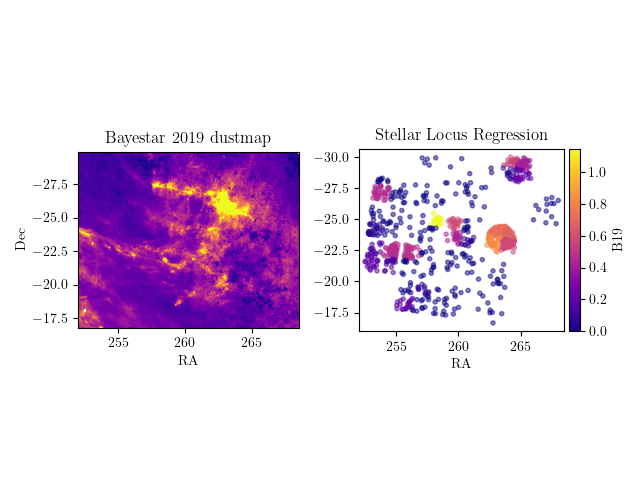

Loading pixel_info ...
Loading samples ...
Loading best_fit ...
Replacing NaNs in reliable distance estimates ...
Sorting pixel_info ...
Extracting hp_idx_sorted and data_idx at each nside ...
  nside = 64
  nside = 128
  nside = 256
  nside = 512
  nside = 1024
t = 29.634 s
  pix_info:   0.418 s
   samples:  19.582 s
      best:   3.991 s
       nan:   0.025 s
      sort:   5.497 s
       idx:   0.121 s


<IPython.core.display.Javascript object>


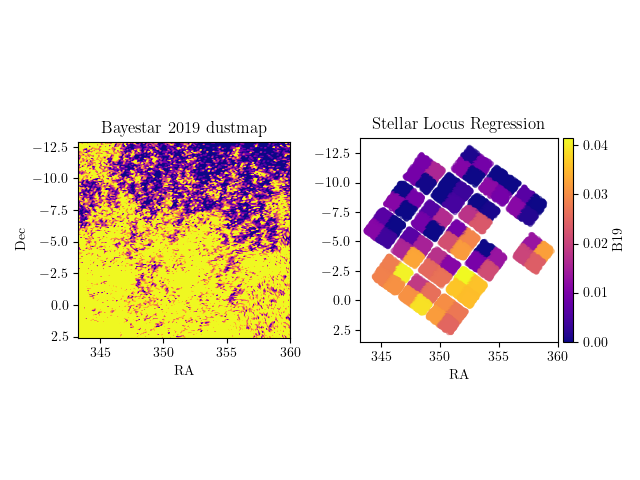

Loading pixel_info ...
Loading samples ...
Loading best_fit ...
Replacing NaNs in reliable distance estimates ...
Sorting pixel_info ...
Extracting hp_idx_sorted and data_idx at each nside ...
  nside = 64
  nside = 128
  nside = 256
  nside = 512
  nside = 1024
t = 29.703 s
  pix_info:   0.389 s
   samples:  19.482 s
      best:   3.931 s
       nan:   0.021 s
      sort:   5.754 s
       idx:   0.127 s


<IPython.core.display.Javascript object>


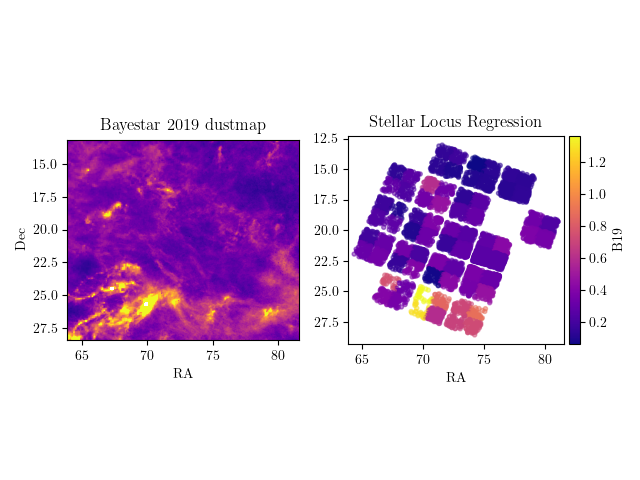

Loading pixel_info ...
Loading samples ...
Loading best_fit ...
Replacing NaNs in reliable distance estimates ...
Sorting pixel_info ...
Extracting hp_idx_sorted and data_idx at each nside ...
  nside = 64
  nside = 128
  nside = 256
  nside = 512
  nside = 1024
t = 28.835 s
  pix_info:   0.399 s
   samples:  18.885 s
      best:   4.017 s
       nan:   0.021 s
      sort:   5.376 s
       idx:   0.137 s


<IPython.core.display.Javascript object>


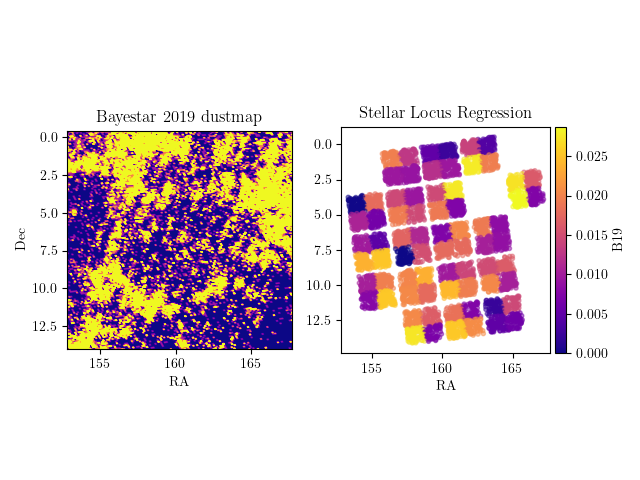

Loading pixel_info ...
Loading samples ...
Loading best_fit ...
Replacing NaNs in reliable distance estimates ...
Sorting pixel_info ...
Extracting hp_idx_sorted and data_idx at each nside ...
  nside = 64
  nside = 128
  nside = 256
  nside = 512
  nside = 1024
t = 29.419 s
  pix_info:   0.372 s
   samples:  19.084 s
      best:   4.296 s
       nan:   0.019 s
      sort:   5.513 s
       idx:   0.134 s


<IPython.core.display.Javascript object>


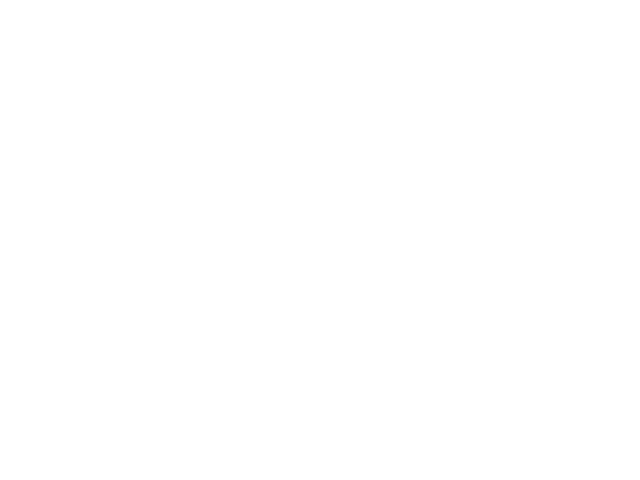

Loading pixel_info ...
Loading samples ...
Loading best_fit ...
Replacing NaNs in reliable distance estimates ...
Sorting pixel_info ...
Extracting hp_idx_sorted and data_idx at each nside ...
  nside = 64
  nside = 128
  nside = 256
  nside = 512
  nside = 1024
t = 28.290 s
  pix_info:   0.367 s
   samples:  18.612 s
      best:   3.843 s
       nan:   0.021 s
      sort:   5.335 s
       idx:   0.112 s


<IPython.core.display.Javascript object>


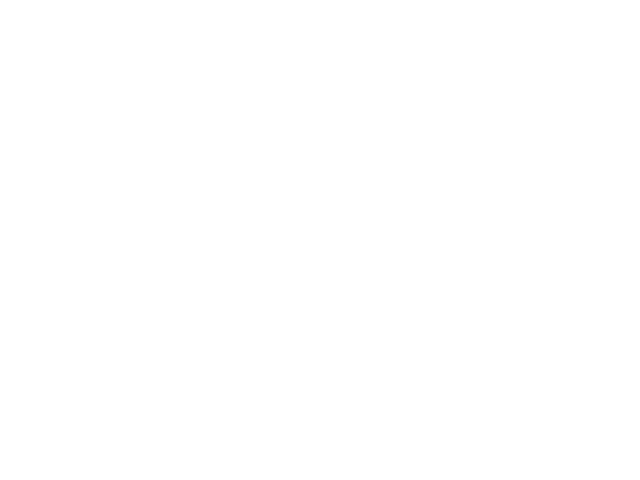

Loading pixel_info ...
Loading samples ...
Loading best_fit ...
Replacing NaNs in reliable distance estimates ...
Sorting pixel_info ...
Extracting hp_idx_sorted and data_idx at each nside ...
  nside = 64
  nside = 128
  nside = 256
  nside = 512
  nside = 1024
t = 29.372 s
  pix_info:   0.370 s
   samples:  19.518 s
      best:   3.936 s
       nan:   0.022 s
      sort:   5.412 s
       idx:   0.114 s


<IPython.core.display.Javascript object>


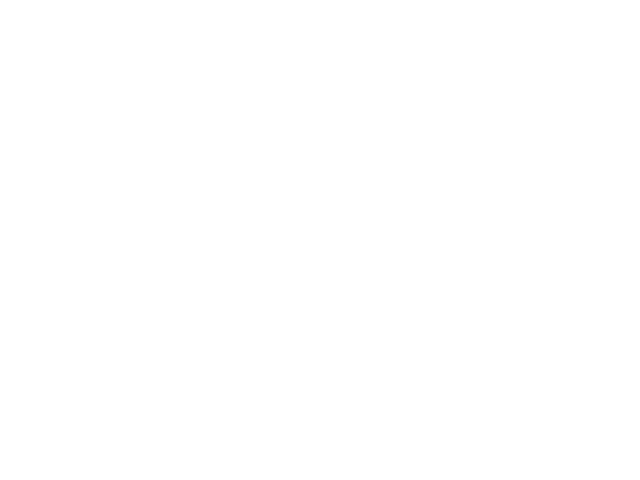

Loading pixel_info ...
Loading samples ...
Loading best_fit ...
Replacing NaNs in reliable distance estimates ...
Sorting pixel_info ...
Extracting hp_idx_sorted and data_idx at each nside ...
  nside = 64
  nside = 128
  nside = 256
  nside = 512
  nside = 1024
t = 28.307 s
  pix_info:   0.367 s
   samples:  18.252 s
      best:   4.022 s
       nan:   0.021 s
      sort:   5.528 s
       idx:   0.119 s


<IPython.core.display.Javascript object>


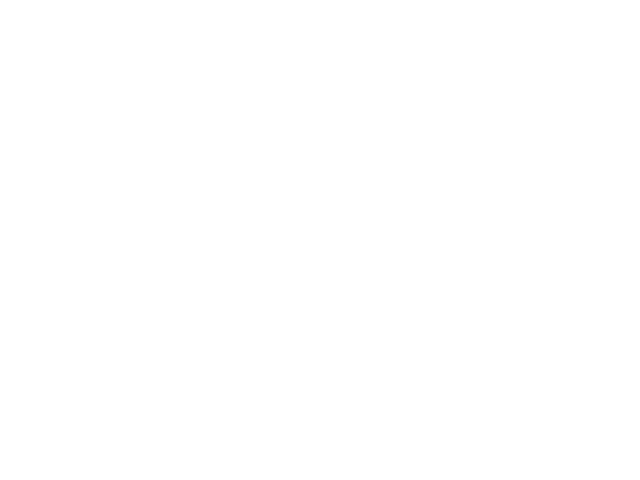

In [174]:
for i in range(20):
    try:
        d = data.iloc[data['campaign'].values == i]
        channel_inds = d['Channel'].values
        camp_inds = d['campaign'].values
        ex = exs[i][channel_inds-1]
        #ex[slr == 0] = np.nan


        ra = np.arange(np.nanmin(d.RAJ2000)-.5,np.nanmax(d.RAJ2000)+.5,.01)
        dec = np.arange(np.nanmin(d.DecJ2000)+.1,np.nanmax(d.DecJ2000)-.1,.01)
        ra, dec = np.meshgrid(ra, dec)
        coords = SkyCoord(ra*u.deg, dec*u.deg,
                          distance=500.*u.pc)
        sources = SkyCoord(d.RAJ2000.values*u.deg, d.DecJ2000.values*u.deg)

        bayestar = BayestarQuery()
        red = bayestar(coords, mode='median')
        #red = red / (3.1 * 0.981)

        plt.figure()
        plt.subplot(121)
        plt.title('Bayestar 2019 dustmap')
        im = plt.imshow(red,extent=[ra[0,0],ra[-1,-1],dec[-1,-1],dec[0,0]],
                   vmin=np.nanmin(ex),vmax=np.nanmax(ex),cmap='plasma')


        plt.ylabel('Dec')
        plt.xlabel('RA')
        
        #divider = make_axes_locatable(plt.gca())
        #cax = divider.append_axes("right", size="5%", pad=0.05)
        #plt.colorbar(im, cax=cax)

        plt.subplot(122)
        plt.title('Stellar Locus Regression')
        #plt.imshow(red/3.1,vmin=0.,extent=[ra[0,0],ra[-1,-1],dec[-1,-1],dec[0,0]])
        im = plt.imshow(np.zeros_like(red)*np.nan,extent=[ra[0,0],ra[-1,-1],dec[-1,-1],dec[0,0]],
                   vmin=np.nanmin(ex),vmax=np.nanmax(ex),cmap='plasma')

        sc = plt.scatter(d.RAJ2000,d.DecJ2000,marker='.',c=ex,alpha=.5,cmap='plasma')
        plt.xlabel('RA')
        divider = make_axes_locatable(plt.gca())
        cax = divider.append_axes("right", size="5%", pad=0.05)
        cbar = plt.colorbar(im, cax=cax)
        cbar.set_label('B19')#r'E(g-r)$_{PS1}$')

        #plt.scatter(d.RAJ2000,d.DecJ2000,marker='.',c=Av2_bayestar/3.1,alpha=.1)
        plt.tight_layout()
        #plt.colorbar()
        plt.savefig('figs/dustmap_compare/dustmap_slr_camp{}.pdf'.format(i), bbox_inches='tight')
    except:
        pass

In [176]:
test = (0.259*3.629+ 0.498*2.611+ 0.177*1.935+ 0.068*1.523)*(3.629/1.935)**0.033

In [182]:
((test)/2.557)

1.0725755064117588

In [26]:
Av2_bayestar

array([0.14999999, 0.21      , 0.22      , ..., 0.62      , 0.79999995,
       0.77      ], dtype=float32)

In [76]:
ex

array([0.0002801 , 0.0002801 , 0.0002801 , ..., 0.00978309, 0.01750274,
       0.01750274])

In [101]:
Av2_bayestar

array([0.22      , 0.21      , 0.24      , ..., 0.62      , 0.79999995,
       0.77      ], dtype=float32)

In [230]:
av = np.zeros(84)
for i in range(84):
    ind = channel_inds == i+1
    av[i] = np.nanmedian(red2[ind])/3.1
    

In [236]:
len(ind)

11374

In [108]:
av

array([       nan, 0.09032258, 0.29032257, 0.24032258, 0.1032258 ,
              nan,        nan,        nan,        nan, 0.12258064,
       0.16774193, 0.22580645, 0.11935484, 0.13709677, 0.13870967,
       0.14193548, 0.21612902,        nan,        nan,        nan,
              nan, 0.2580645 , 0.23709678, 0.24516129, 0.27903226,
       0.13870967, 0.21774192, 0.26451613, 0.2580645 , 0.16451613,
       0.11935484, 0.19354838, 0.18387097, 0.15806451, 0.17741936,
       0.17096773, 0.21290322, 0.35161291, 0.42580643, 0.27419354,
       0.21451612, 0.09032258, 0.14516129, 0.30645161, 0.31290322,
       0.28387097, 0.28548387, 0.12258064, 0.22258064, 0.26129032,
       0.07419354, 0.07419354, 0.22258064, 0.1032258 , 0.22903225,
       0.11290322, 0.06935484, 0.05806451, 0.14516129, 0.21935484,
       0.08387096, 0.06451613, 0.07096774, 0.07096774, 0.07096774,
       0.13548387, 0.08870967, 0.09354838, 0.08709677, 0.08709677,
       0.08387096, 0.08387096, 0.06451613, 0.04193548, 0.04516

In [231]:
zp = np.array([25.33616834, 25.36567462, 25.29153165, 25.27833937,  0.        ,
        0.        ,  0.        ,  0.        , 25.35071157, 25.277267  ,
       25.24726113, 25.27158268, 25.28849614, 25.25697768, 25.24562322,
       25.26956813,  0.        ,  0.        ,  0.        ,  0.        ,
       25.43871677, 25.40815942, 25.39303043, 25.40143357, 25.38993379,
       25.40541049, 25.38767031, 25.36507609, 25.34746571, 25.34431881,
       25.30302636, 25.27882655, 25.28118811, 25.30841611, 25.23357251,
       25.26417885, 25.39216763, 25.39331314, 25.37465654, 25.375585  ,
       25.35709958, 25.36312488, 25.38005668, 25.33416196, 25.36706552,
       25.36946958, 25.35204727, 25.31859425, 25.32925545, 25.33251473,
       25.22602913, 25.23627658, 25.32941543, 25.3367208 , 25.34053757,
       25.29013576, 25.38620445, 25.40207742, 25.37775712, 25.34429613,
       25.34802196, 25.35705611, 25.35811933, 25.35849926, 25.38582208,
       25.42339465, 25.3664497 , 25.34526134, 25.36724133, 25.34823782,
       25.30016197, 25.31097231, 25.31216934, 25.33771765, 25.31510186,
       25.33659898, 25.29489437, 25.29957022, 25.30457381, 25.29036506,
       25.31619918, 25.33430409, 25.32468505, 25.3196753 ])

In [232]:
zp[zp==0] = np.nan

<IPython.core.display.Javascript object>


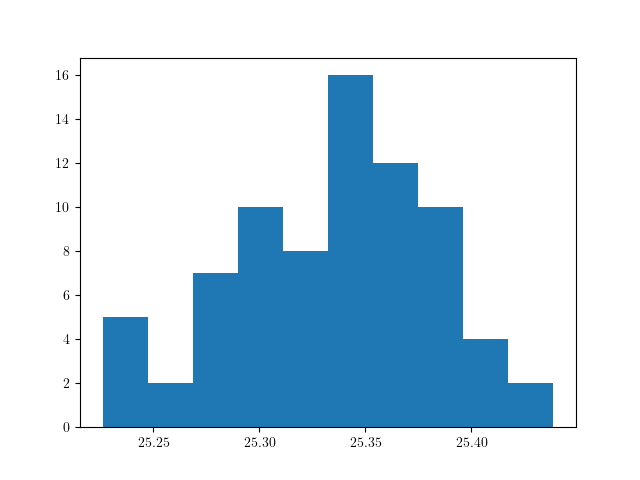

(array([ 5.,  2.,  7., 10.,  8., 16., 12., 10.,  4.,  2.]),
 array([25.22602913, 25.24729789, 25.26856666, 25.28983542, 25.31110419,
        25.33237295, 25.35364171, 25.37491048, 25.39617924, 25.41744801,
        25.43871677]),
 <a list of 10 Patch objects>)

In [233]:
plt.figure()
plt.hist(zp)

In [252]:
from astropy.stats import sigma_clip

In [253]:
sigma_clip()

<function astropy.stats.sigma_clipping.sigma_clip(data, sigma=3, sigma_lower=None, sigma_upper=None, maxiters=5, cenfunc='median', stdfunc='std', axis=None, masked=True, return_bounds=False, copy=True)>

In [276]:
ozp = np.load('zeropoint_kep.npy')[8]

In [279]:
ozp[16]

array([25.31179809, 25.35781113, 25.26542999, 25.25293512,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , 25.27203713, 25.24856732, 25.23981659,
       25.23680794,  0.        ,  0.        ,  0.        ,  0.        ,
       25.4174269 , 25.38279382, 25.36674876, 25.38699252, 25.37306709,
       25.39061184, 25.37254617, 25.34410179, 25.33689526, 25.32470077,
       25.12075214, 25.26446001, 25.2840031 , 25.30205823, 25.22504769,
       25.26621439, 25.37059767, 25.37681816, 25.35598046, 25.35785803,
       25.33651996, 25.36071258, 25.36379555, 25.31934617, 25.35492058,
       25.35414179, 25.33448381, 25.30617322, 25.31565879, 25.3310008 ,
       25.22180745, 25.20228345, 25.31104277, 25.31984712, 25.32816063,
       25.29152227, 25.37844977, 25.39302526, 25.36152319, 25.34148517,
       25.33710046, 25.34580798, 25.34528315, 25.3495879 , 25.35990109,
       25.4058698 , 25.35120353, 25.33377373, 25.34218399, 25.33

In [263]:
zps = []
ozps = []
for i in range(len(channel_inds)):
    zps += [zp[channel_inds[i]-1]]
    ozps += [ozp[channel_inds[i]-1]]

In [264]:
mag = d['kMeanPSFMag'].values + zps
diff = mag-d['Kpmag']
mask = sigma_clip(diff).mask

omag = d['kMeanPSFMag'].values + ozps
odiff = omag-d['Kpmag']
omask = sigma_clip(odiff).mask

In [257]:
mask

array([False, False, False, ..., False, False, False])

<IPython.core.display.Javascript object>


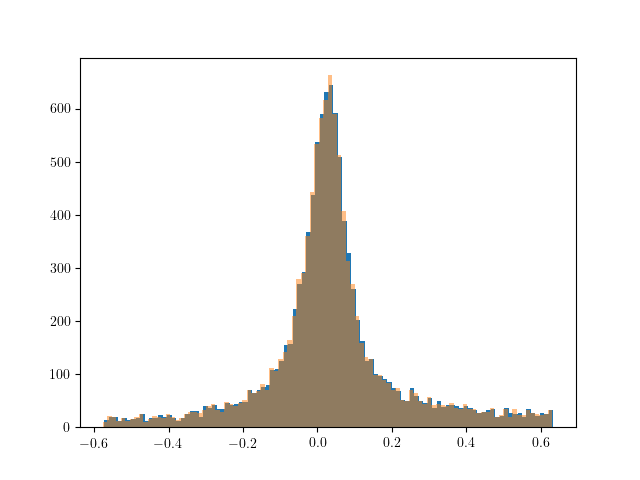

(array([ 10.,  21.,  20.,  11.,  17.,  12.,  16.,  19.,  24.,  10.,  16.,
         22.,  20.,  18.,  24.,  20.,  13.,  17.,  24.,  28.,  29.,  27.,
         32.,  40.,  44.,  32.,  29.,  48.,  43.,  40.,  45.,  51.,  70.,
         64.,  68.,  82.,  70., 111., 105., 129., 141., 165., 209., 279.,
        290., 361., 443., 534., 582., 616., 663., 589., 513., 407., 313.,
        269., 209., 158., 133., 129.,  99.,  99.,  88.,  84.,  71.,  73.,
         52.,  49.,  71.,  64.,  49.,  44.,  56.,  41.,  43.,  41.,  39.,
         45.,  36.,  34.,  44.,  34.,  34.,  27.,  28.,  29.,  37.,  19.,
         23.,  34.,  20.,  34.,  23.,  23.,  32.,  26.,  25.,  23.,  24.,
         32.]),
 array([-0.57752927, -0.56543139, -0.55333351, -0.54123562, -0.52913774,
        -0.51703986, -0.50494197, -0.49284409, -0.48074621, -0.46864832,
        -0.45655044, -0.44445256, -0.43235467, -0.42025679, -0.40815891,
        -0.39606102, -0.38396314, -0.37186526, -0.35976738, -0.34766949,
        -0.33557161, -0.32

In [267]:
plt.figure()
plt.hist(diff[~mask],bins=100)
plt.hist(odiff[~omask],bins=100,alpha =.5)


In [245]:
d

ID  campaign   Kpmag    RAJ2000   DecJ2000               objID  \
68444   220131668         8  15.947  17.040012  -2.654249  104810170402205262   
68626   220132548         8  15.993  17.116724  -2.613616  104860171166314036   
68752   220133206         8  15.212  16.970102  -2.583730  104890169700799709   
69215   220135402         8  13.932  17.152189  -2.480210  105020171521944222   
69280   220135817         8  13.873  16.942633  -2.462662  105040169427795272   
...           ...       ...     ...        ...        ...                 ...   
121591  220748053         8  14.561  15.557860  13.014790  123610155581718235   
121641  220748527         8  13.654  15.721364  13.031675  123630157213258521   
121663  220748569         8  14.017  15.611486  13.033483  123640156114380670   
121736  220749255         8  14.053  15.484644  13.058892  123670154846361059   
121812  220749844         8  14.980  15.591967  13.078495  123690155919394671   

        ps_score     raMean    decMean  raMeanErr  ...  ciMeanPSFMag  \
68444   1.000000  17.040225  -2.654320    0.00234  ...       15.7081   
68626   1.000000  17.116667  -2.613676    0.00295  ...       16.0306   
68752   0.987750  16.970108  -2.584006    0.00384  ...       14.6547   
69215   0.999167  17.152270  -2.480167    0.00913  ...       13.6077   
69280   0.997500  16.942864  -2.462688    0.03917  ...       13.7037   
...          ...        ...        ...        ...  ...           ...   
121591  0.944562  15.558345  13.014753    0.05961  ...       13.9267   
121641  1.000000  15.721382  13.031665    0.00705  ...       13.7728   
121663  0.998333  15.611470  13.033478    0.00390  ...       13.5945   
121736  0.994375  15.484614  13.058808    0.00951  ...       13.7844   
121812  0.987500  15.591986  13.078490    0.00967  ...       14.6849   

        czMeanPSFMag  cyMeanPSFMag  cgMeanPSFMagErr  crMeanPSFMagErr  \
68444        15.5638       15.4795         0.008252         0.001655   
68626        15.9982       15.9627         0.004765         0.001943   
68752        14.3475       14.1850         0.005754         0.003421   
69215        13.5169       13.4356         0.002361         0.005155   
69280        13.6896       13.6721         0.022279         0.002290   
...              ...           ...              ...              ...   
121591       13.5925       13.4489         0.004602         0.018461   
121641       13.4093       13.3806         0.003201         0.002198   
121663       13.4315       13.3256         0.001982         0.010619   
121736       13.7071       13.6411         0.002098         0.006497   
121812       14.6018       14.5393         0.001460         0.002539   

        ciMeanPSFMagErr  czMeanPSFMagErr  cyMeanPSFMagErr  kMeanPSFMag  \
68444          0.002609         0.002997         0.003540    -9.096333   
68626          0.001232         0.002642         0.005932    -9.496757   
68752          0.002192         0.000815         0.003887   -10.094717   
69215          0.002135         0.003266         0.006284   -11.406050   
69280          0.008248         0.004760         0.003438   -11.481746   
...                 ...              ...              ...          ...   
121591         0.005775         0.007073         0.011211   -10.790508   
121641         0.022007         0.004893         0.003188   -11.649992   
121663         0.008413         0.002966         0.004087   -11.279673   
121736         0.002552         0.001539         0.002414   -11.197165   
121812         0.003010         0.001997         0.005136   -10.260128   

        kMeanPSFMagErr  
68444             0.01  
68626             0.01  
68752             0.01  
69215             0.01  
69280             0.01  
...                ...  
121591            0.01  
121641            0.01  
121663            0.01  
121736            0.01  
121812            0.01  

[11374 rows x 66 columns]